# VR - Motion recognition with simple gestures

## Libraries
* Numpy
* Pandas
* Matplotlib
* PyTorch

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.onnx


## Importing scripts

In [2]:
from utils.data import Data
from utils.hardware import Hardware
from utils.model import VRGestureRecognizer

## Loading data

In [3]:
# Define base data directory
base_dir: str = os.path.join(os.getcwd(), 'data')

# Load data
tuple_data: tuple[np.ndarray, np.ndarray, np.ndarray] = Data.load_data(base_dir)

# Unpack data
data: np.ndarray = tuple_data[0]
labels: np.ndarray = tuple_data[1]
classes: np.ndarray = tuple_data[2]

## Settings and hyperparameters ...

In [4]:
DEVICE = Hardware.device()
BATCH_SIZE = 10
EPOCHS = 50

## Model - Convolutional Neural Network

### Training

Epoch [1/50] | Loss: 1.61 | Accuracy: 0.26
Epoch [2/50] | Loss: 1.35 | Accuracy: 0.38
Epoch [3/50] | Loss: 1.33 | Accuracy: 0.48
Epoch [4/50] | Loss: 1.22 | Accuracy: 0.56
Epoch [5/50] | Loss: 1.08 | Accuracy: 0.76
Epoch [6/50] | Loss: 1.10 | Accuracy: 0.78
Epoch [7/50] | Loss: 0.89 | Accuracy: 0.80
Epoch [8/50] | Loss: 0.88 | Accuracy: 0.78
Epoch [9/50] | Loss: 1.04 | Accuracy: 0.80
Epoch [10/50] | Loss: 0.85 | Accuracy: 0.80
Epoch [11/50] | Loss: 0.86 | Accuracy: 0.80
Epoch [12/50] | Loss: 0.84 | Accuracy: 0.80
Epoch [13/50] | Loss: 0.85 | Accuracy: 0.80
Epoch [14/50] | Loss: 1.03 | Accuracy: 0.80
Epoch [15/50] | Loss: 1.12 | Accuracy: 0.80
Epoch [16/50] | Loss: 0.94 | Accuracy: 0.80
Epoch [17/50] | Loss: 1.12 | Accuracy: 0.80
Epoch [18/50] | Loss: 0.78 | Accuracy: 0.82
Epoch [19/50] | Loss: 0.78 | Accuracy: 0.98


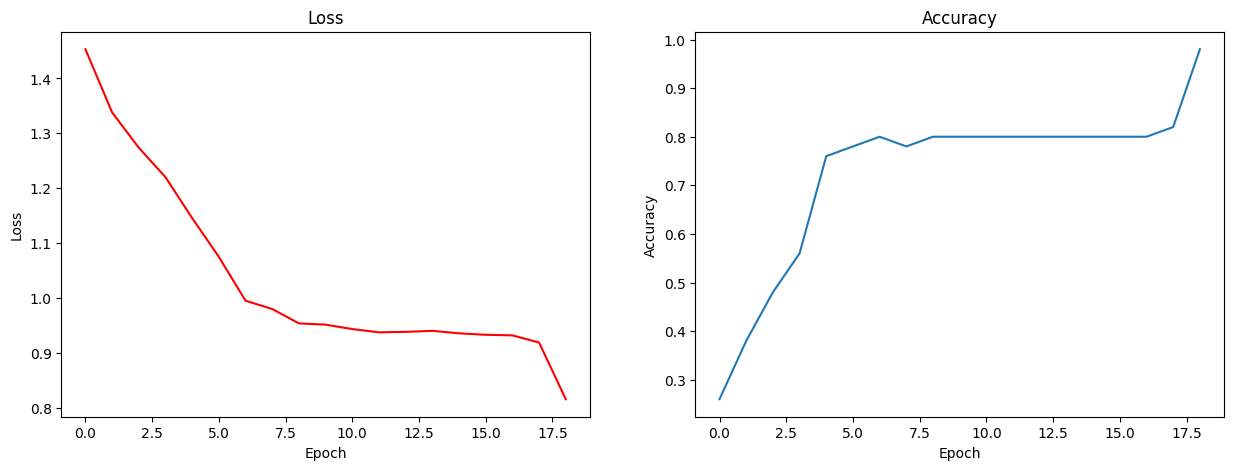

In [5]:
gesture_recognizer = VRGestureRecognizer(hidden_size=128, num_classes=classes.shape[0]).to(Hardware.device(), dtype=torch.float32)
optimizer = torch.optim.Adam(gesture_recognizer.parameters(), lr=1e-4)
loss_fn = nn.CrossEntropyLoss()

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.15, random_state=42)

gesture_recognizer.compile(optimizer, loss_fn)
training_history = gesture_recognizer.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, learning_rate=1e-4)

gesture_recognizer.plot_history()

### Evaluation

In [6]:
test_loss, test_accuracy = gesture_recognizer.evaluate(X_test, y_test)
print(f"Loss: {test_loss.item():.2f} | Accuracy: {test_accuracy * 100:.2f}%")

Loss: 0.81 | Accuracy: 100.00%


## Exporting the model

In [7]:
gesture_recognizer.export_to_onnx(path='gesture_recognizer.onnx')

================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

